In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
tweets = pd.read_csv('Twitter_Data.csv')

In [3]:
tweets.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
tweets.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [5]:
tweets.isnull().sum()

clean_text    4
category      7
dtype: int64

In [6]:
print("Missing Rows: ")
print(tweets[tweets.isnull().any(axis=1)])

Missing Rows: 
                                               clean_text  category
148                                                   NaN       0.0
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
158694                                                NaN      -1.0
159442               chidambaram gives praises modinomics       NaN
159443                                                NaN       0.0
160559  the reason why modi contested from seats 2014 ...       NaN
160560                                                NaN       1.0


In [7]:
clean_tweets = tweets.dropna()
print("After cleaning: ")
clean_tweets.isnull().sum()

After cleaning: 


clean_text    0
category      0
dtype: int64

In [8]:
print("Duplicate rows: ")
clean_tweets[clean_tweets.duplicated()]

Duplicate rows: 


,clean_text,category


In [9]:
print("Total number of tweets: ")
len(clean_tweets)

Total number of tweets: 


162969

Text(0, 0.5, 'Count')

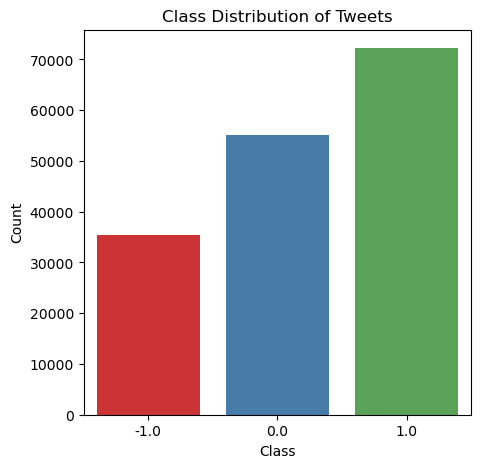

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(data=clean_tweets, x='category', palette='Set1')
plt.title('Class Distribution of Tweets')
plt.xlabel('Class')
plt.ylabel('Count')

In [11]:
sampled_tweets = clean_tweets.sample(frac=0.1, random_state=42)  # Sample 10% of the data

In [12]:
sampled_tweets = clean_tweets.sample(frac=0.1, random_state=42)  # Sample 10% of the data
def Text_Preprocessing(tweets):
    # Convert to lowercase
    tweets = tweets.lower()
    # Remove URLs
    tweets = re.sub(r'http\S+|www\S+', '', tweets)
    # Remove mentions
    tweets = re.sub(r'@\w+', '', tweets) 
    # Remove hashtags
    tweets = re.sub(r'#\w+', '', tweets)
    # Remove special characters and numbers
    tweets = re.sub(r'[^a-zA-Z\s]', '', tweets)
    # Tokenize
    tokens = word_tokenize(tweets)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Join tokens back into a single string
    preprocessed_tweet = ' '.join(stemmed_tokens)
    return preprocessed_tweet
sampled_tweets['clean_text'] = sampled_tweets['clean_text'].apply(Text_Preprocessing)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/3ac56091-c2bb-4cc7-8329-
[nltk_data]     078565969efb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/3ac56091-c2bb-4cc7-8329-
[nltk_data]     078565969efb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
sampled_tweets.head()

,clean_text,category
42229,news flash modi address nation cancel trip atm,0.0
22035,accord congress ecosystem bjp divid hous peopl...,1.0
79982,friend gut let drdo test modi pleas explain pr...,-1.0
118493,modi violat model code conduct speak arm forc ...,-1.0
12815,raoul gandhi ask modi nirav year never ask pch...,0.0


In [14]:
sampled_tweets.tail()

,clean_text,category
52929,talk work modi mantra,0.0
18093,what take kind respons gener public seem belie...,1.0
48086,modi play elect use nation secur issu doubt be...,1.0
142236,narendra modi nervou desper,-1.0
159553,modi power fat flower,0.0


In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sampled_tweets['clean_text'], sampled_tweets['category'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a classifier
classifier = SVC()
classifier.fit(X_train_tfidf, y_train)
predictions = classifier.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7561349693251533
